# Comparison with other OPs

## Load values

$q_\mathrm{tet}$: tetrahedrality (Errington, J. R. & Debenedetti, P. G. Relationship between structural order and the anomalies of liquid water. Nature 409, 318–321 (2001).)

$g_5$: Distance to the 5th nearest neighbor (Cuthbertson, M. J.; Poole, P. H. Mixturelike Behavior Near a Liquid-Liquid Phase Transition in Simulations of Supercooled Water. Phys. Rev. Lett. 2011, 106, 115706.)

$\eta$: Gap between 1st and 2nd shells along the HB network (Russo, J. & Tanaka, H. Understanding water’s anomalies with locally favoured structures. Nat Commun 5, 3556 (2014).)

They are calculated with genice-localstruct plugin. Note that the original data are required to reproduce the graphs.

In [36]:
import os
import numpy as np

ST2 = dict()
ST2["Ic"]  = np.loadtxt(os.popen("cat /Volumes/workarea/work/NPT-ST2/Ic/P-1_T-235/*.local"))
ST2["Ih"]  = np.loadtxt(os.popen("cat /Volumes/workarea/work/NPT-ST2/Ih/P-1_T-235/*.local"))
ST2["LDL"] = np.loadtxt(os.popen("cat /Volumes/workarea/work/LL-yaga/240K-0.88/*.local"))
ST2["HDL"] = np.loadtxt(os.popen("cat /Volumes/workarea/work/LL-yaga/240K-1.04/*.local"))



## Histograms

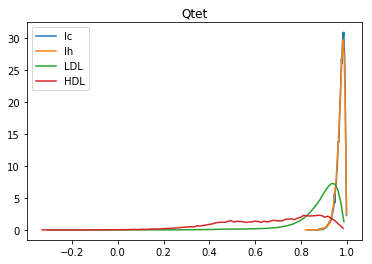

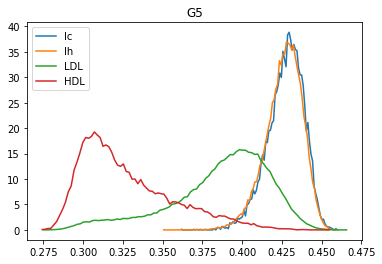

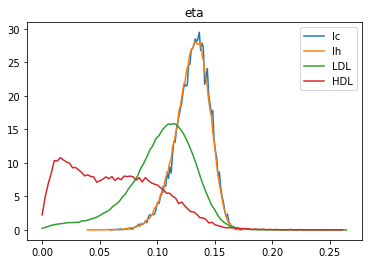

In [37]:
%matplotlib inline

from matplotlib import pyplot as plt

for col, op in enumerate(["Qtet", "G5", "eta"]):
    H = dict()
    for phase in ("Ic", "Ih", "LDL", "HDL"):
        H[phase] = np.histogram(ST2[phase][:,col], bins=100, normed=True)
        plt.plot(H[phase][1][:-1],H[phase][0], "-", label=phase)
    plt.title(op)
    plt.legend()
    plt.show()


## Correlations

No handles with labels found to put in legend.


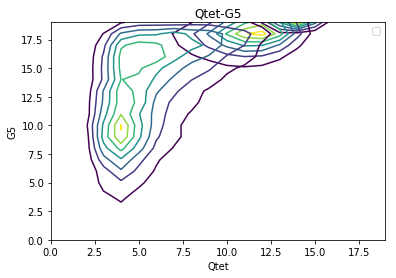

No handles with labels found to put in legend.


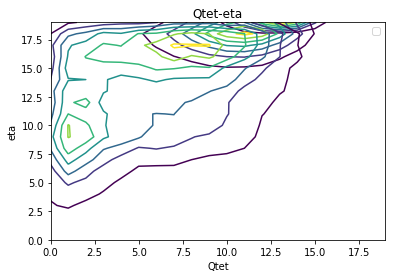

No handles with labels found to put in legend.


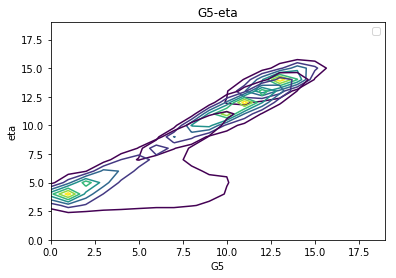

In [60]:
%matplotlib inline
from itertools import combinations

ops = ["Qtet", "G5", "eta"]
ranges= [[0.0, 1.0], [0.25, 0.5], [0.0, 0.2]]

for i,j in combinations((0,1,2), 2):
    for phase in ("Ic", "LDL", "HDL"):
        H = np.histogram2d(ST2[phase][:,i], ST2[phase][:,j], bins=(20,20), range=[ranges[i], ranges[j]])
        plt.contour(H[0], label=phase)
    plt.xlabel(ops[i])
    plt.ylabel(ops[j])
    plt.title(ops[i]+"-"+ops[j])
    plt.legend()
    plt.show()



## Time evolution

Changes in local structure indices along the liquid-liquid separation trajectory.

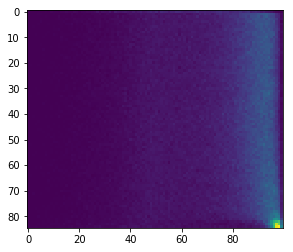

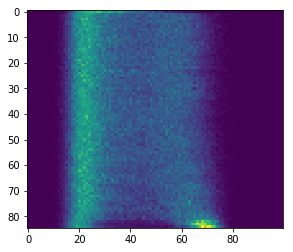

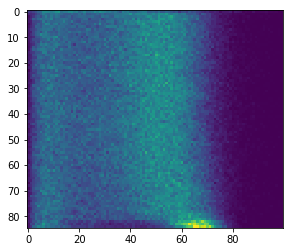

In [46]:
LEN=85

ranges= [[0.0, 1.0], [0.25, 0.5], [0.0, 0.2]]
for j, op in enumerate(["Qtet", "G5", "eta"]):
    H = np.zeros([LEN,100])
    for i in range(LEN):
        LL = np.loadtxt(os.popen("cat /Volumes/workarea/work/LL-yaga/235K-0.98/10{0:02d}000.local".format(i)))
        
        hist = np.histogram(LL[:,j], bins=100, range=ranges[j], normed=True)
        H[i] = hist[0]
    plt.imshow(H)
    plt.show()


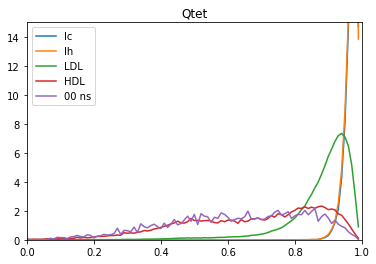

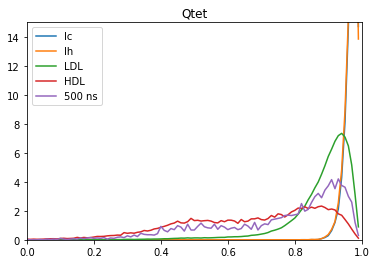

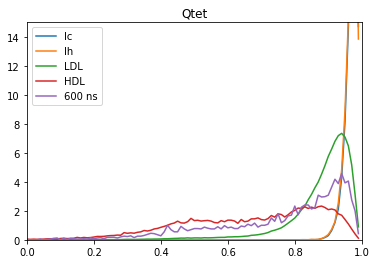

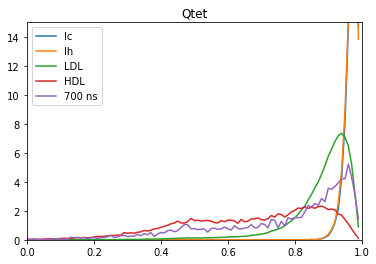

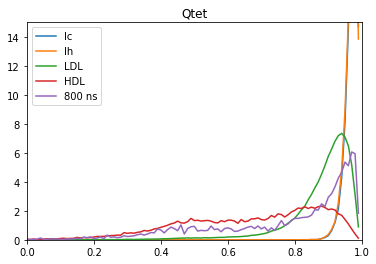

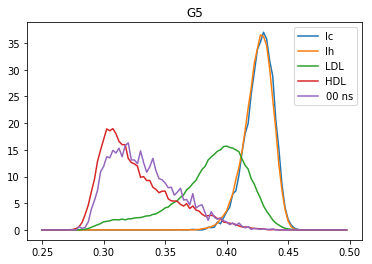

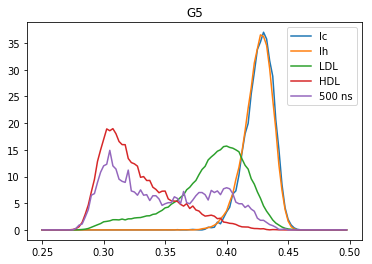

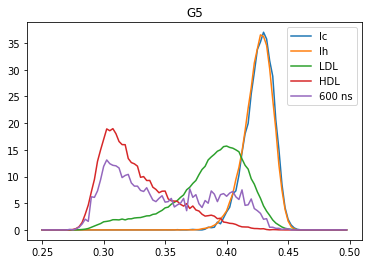

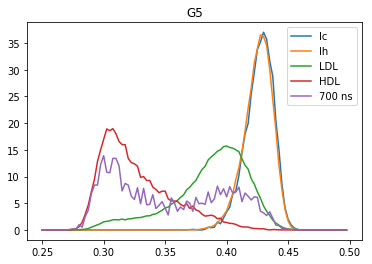

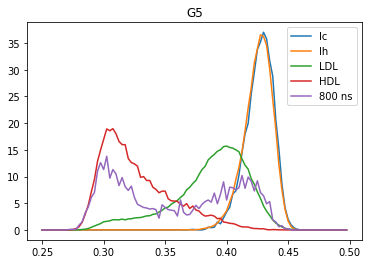

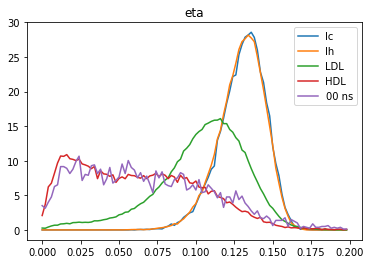

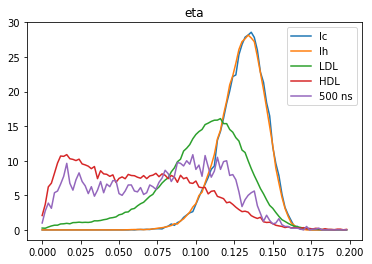

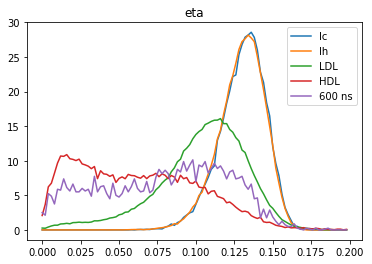

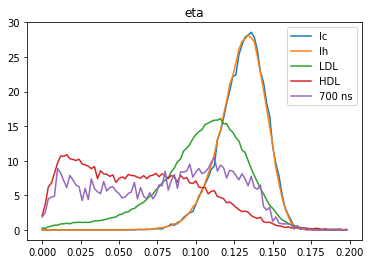

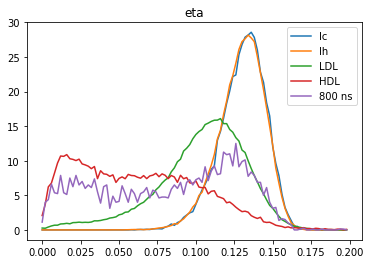

In [63]:
ranges= [[0.0, 1.0], [0.25, 0.5], [0.0, 0.2]]

for col, op in enumerate(["Qtet", "G5", "eta"]):
    for t in (0, 50, 60, 70, 80):
        H = dict()
        for phase in ("Ic", "Ih", "LDL", "HDL"):
            H[phase] = np.histogram(ST2[phase][:,col], bins=100, normed=True, range=ranges[col])
            plt.plot(H[phase][1][:-1],H[phase][0], "-", label=phase)
        LL = np.loadtxt(os.popen("cat /Volumes/workarea/work/LL-yaga/235K-0.98/10{0:02d}000.local".format(t)))
        hist = np.histogram(LL[:,col], bins=100, normed=True, range=ranges[col])
        plt.plot(hist[1][:-1], hist[0], "-", label="{0}0 ns".format(t))
        if op == "Qtet":
            plt.xlim(0,1)
            plt.ylim(0,15)
        plt.title(op)
        plt.legend()
        plt.savefig("{0}.{1}0ns.svg".format(op,t))
        plt.show()

